<a href="https://colab.research.google.com/github/DilyaraKayumovna/Portfolio/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B0%D0%B2%D0%B0%D1%80%D0%B8%D0%B9%D0%BD%D1%8B%D1%85_%D1%81%D0%B8%D1%82%D1%83%D0%B0%D1%86%D0%B8%D0%B9_%D0%BD%D0%B0_%D0%BD%D0%B5%D1%84%D1%82%D0%B5%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%B0%D1%85_%D0%B2_%D0%A1%D0%A8%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('database.csv')
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


**Подготовка данных**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

In [ ]:
df.drop(['Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All Fatalities', 'Liquid Name', 'Supplemental Number', 'Public Evacuations', 'Intentional Release (Barrels)'], axis = 1, inplace = True)

In [ ]:
df['Accident Year'].value_counts()

2015    462
2014    454
2016    415
2013    401
2012    366
2010    350
2011    345
2017      2
Name: Accident Year, dtype: int64

In [ ]:
df = df.drop(df[df['Accident Year'] == 2017].index)

In [ ]:
df['Accident Date/Time'] = pd.to_datetime(df['Accident Date/Time'])
df['Shutdown Date/Time'] = pd.to_datetime(df['Shutdown Date/Time'])
df['Restart Date/Time'] = pd.to_datetime(df['Restart Date/Time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2793 entries, 0 to 2792
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Report Number                         2793 non-null   int64         
 1   Accident Year                         2793 non-null   int64         
 2   Accident Date/Time                    2793 non-null   datetime64[ns]
 3   Operator ID                           2793 non-null   int64         
 4   Operator Name                         2793 non-null   object        
 5   Pipeline/Facility Name                2672 non-null   object        
 6   Pipeline Location                     2793 non-null   object        
 7   Pipeline Type                         2775 non-null   object        
 8   Liquid Type                           2793 non-null   object        
 9   Liquid Subtype                        1348 non-null   object        
 10  

In [ ]:
df.describe()

,Report Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.793000e+03,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2.786000e+03,2.789000e+03,2.783000e+03,2.787000e+03,2.785000e+03,2.777000e+03,2.793000e+03
mean,2.013290e+07,2013.185106,21381.244540,35.782190,-95.687533,207.392743,75.104032,132.288711,1.123563e+05,9.812255e+03,2.514000e+04,2.920900e+05,3.630700e+05,3.438078e+04,8.345992e+05
std,1.980319e+04,1.970166,12432.472199,5.652550,12.329427,1369.146918,546.380344,1185.438327,8.713044e+05,6.386312e+04,5.245461e+05,4.618727e+06,1.207320e+07,6.193458e+05,1.658422e+07
min,2.010000e+07,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,2012.000000,11169.000000,30.909440,-100.591781,0.480000,0.000000,0.000000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039000e+03
50%,2.013037e+07,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.740000,0.000000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.770000e+02,0.000000e+00,2.305200e+04
75%,2.015023e+07,2015.000000,31618.000000,40.262939,-91.116274,20.000000,8.000000,2.000000,2.500000e+04,7.000000e+02,0.000000e+00,1.543000e+04,1.500000e+04,0.000000e+00,1.173950e+05
max,2.017003e+07,2016.000000,99043.000000,70.261265,104.263399,30565.000000,18245.000000,30565.000000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


**Анализ данных**

*Динамика количества аварий по годам*

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

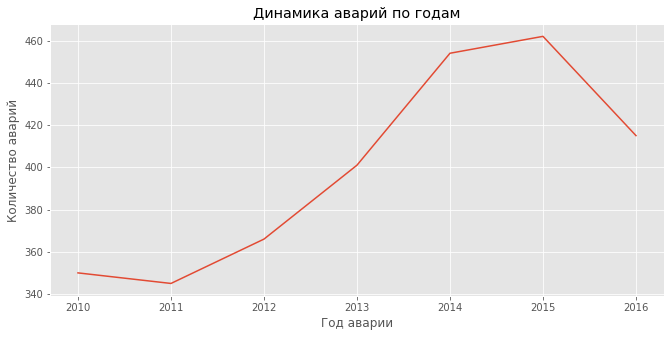

In [ ]:
df.groupby('Accident Year').count()['Report Number'].plot(title = 'Динамика аварий по годам',
                                                          xlabel = 'Год аварии',
                                                          ylabel = 'Количество аварий')

In [ ]:
# Количество аварий выросло с 2010 по 2015гг, в 2016 наблюдается небольшой спад.

*Оценка различных показателей в зависимости от типа трубопровода*

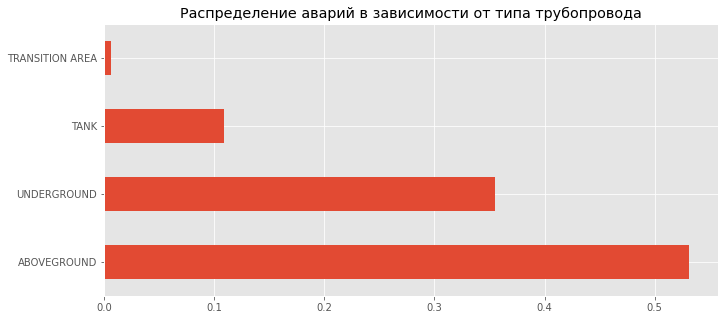

In [ ]:
df['Pipeline Type'].value_counts(normalize = True).plot\
(kind = 'barh', title = 'Распределение аварий в зависимости от типа трубопровода')

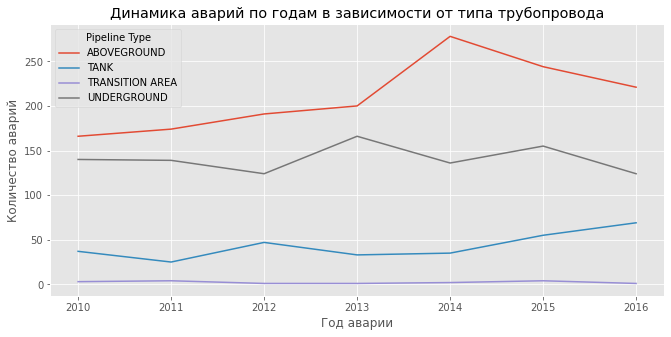

In [ ]:
pd.crosstab(df['Accident Year'], df['Pipeline Type']).plot(title = 'Динамика аварий по годам в зависимости от типа трубопровода', 
                                                           xlabel = 'Год аварии', ylabel = 'Количество аварий')


In [ ]:
# Более 50% всех аварий происходят в наземных трубопроводах, наблюдается рост с 2010 по 2014, потом небольшой спад.
# 35% всех аварий - в подземных трубопроводах, выраженной динамики по годам не видим.

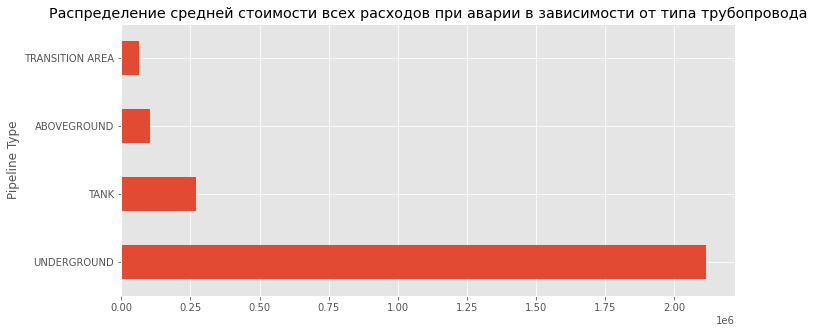

In [ ]:
df.groupby('Pipeline Type')['All Costs'].mean().sort_values(ascending=False).head().plot(kind = 'barh',
                title = 'Распределение средней стоимости всех расходов при аварии в зависимости от типа трубопровода')

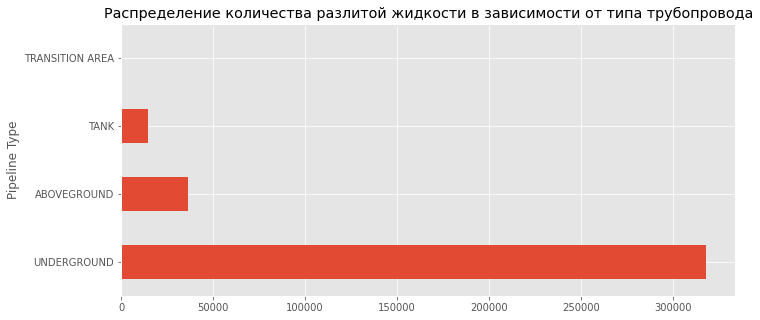

In [ ]:
df.groupby('Pipeline Type').sum()['Net Loss (Barrels)'].sort_values(ascending = False).plot(kind = 'barh', 
            title = 'Распределение количества разлитой жидкости в зависимости от типа трубопровода')

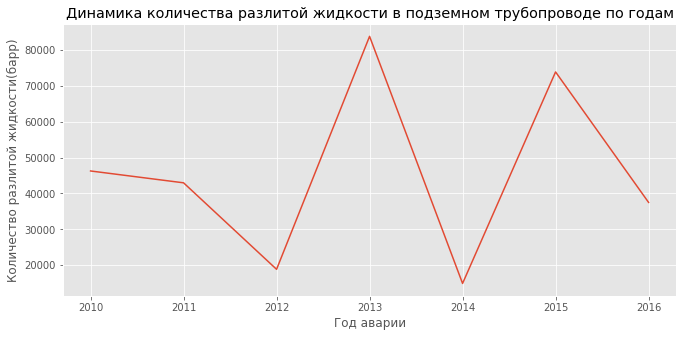

In [ ]:
pd.pivot_table(data=df, index = 'Accident Year', values = 'Net Loss (Barrels)', aggfunc = 'sum', 
        columns = 'Pipeline Type')['UNDERGROUND'].plot(title = 'Динамика количества разлитой жидкости в подземном трубопроводе по годам',
                                                       xlabel = 'Год аварии', ylabel = 'Количество разлитой жидкости(барр)')

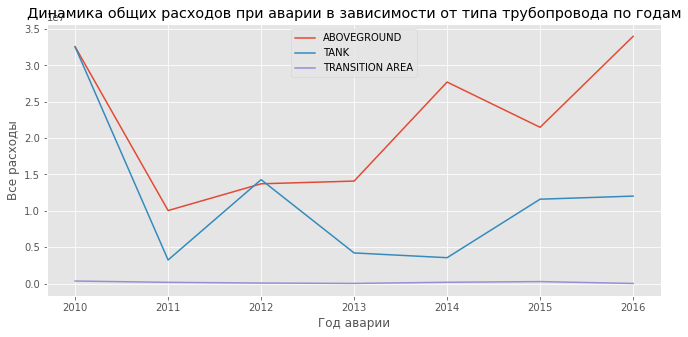

In [ ]:
pd.pivot_table(data=df, index = 'Accident Year', values = 'All Costs', aggfunc = 'sum', 
        columns = 'Pipeline Type').drop('UNDERGROUND', axis = 1).plot(title = \
                        'Динамика общих расходов при аварии в зависимости от типа трубопровода по годам',
                         xlabel = 'Год аварии', ylabel = 'Все расходы')
plt.legend(loc='upper center')

In [ ]:
# Самыми затратными и убыточными по количеству разлитой при аварии жидкости являются аварии на подземных трубопроводах.
# Сумма общих расходов в наземных трубопроводах устойчиво растет с 2011 по 2016 гг.

*Оценка показателей в зависимости от причины аварии*

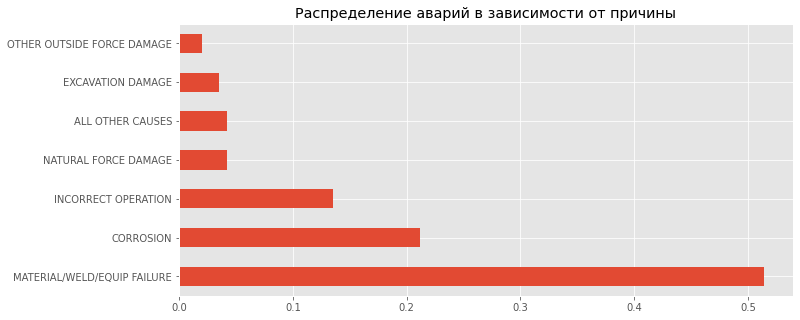

In [ ]:
df['Cause Category'].value_counts(normalize = True).plot(kind = 'barh', title = 'Распределение аварий в зависимости от причины')

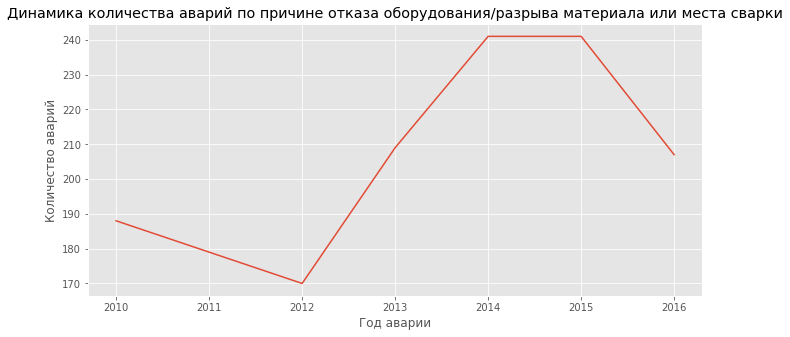

In [ ]:
pd.crosstab(df['Accident Year'], df['Cause Category'])['MATERIAL/WELD/EQUIP FAILURE'].\
plot(title = 'Динамика количества аварий по причине отказа оборудования/разрыва материала или места сварки', 
     xlabel = 'Год аварии', ylabel = 'Количество аварий')

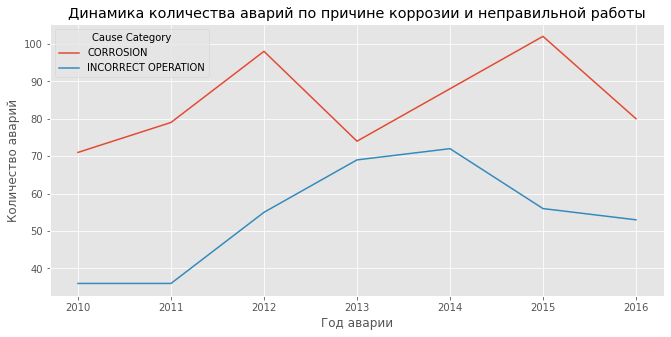

In [ ]:
pd.crosstab(df['Accident Year'], df['Cause Category'])[['CORROSION','INCORRECT OPERATION']].\
plot(title = 'Динамика количества аварий по причине коррозии и неправильной работы', 
     xlabel = 'Год аварии', ylabel = 'Количество аварий')

In [ ]:
# Самая частая причина аварий - это отказ оборудования/разрыв материала или места сварки (более 50%), 
# вторая по частоте причина - коррозия (более 20%), третья - неправильная работа (примерно 15%).
# Наблюдаем резкое увеличение аварий с 2012 по 2015 гг по самой частой причине.
# Динамика аварий по причине коррозии и неправильной работы также имеет тенденцию к увеличению.

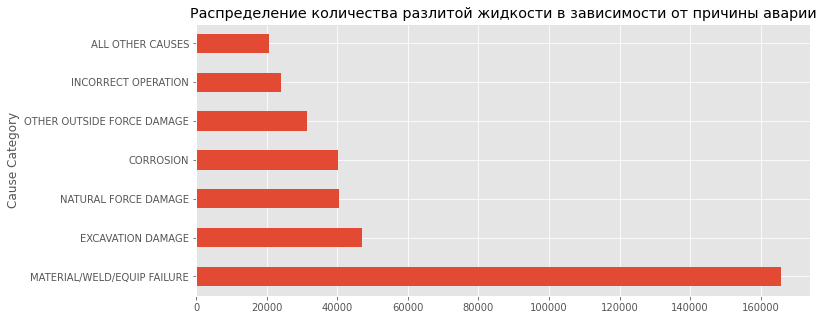

In [ ]:
df.groupby('Cause Category').sum()['Net Loss (Barrels)'].sort_values(ascending = False).plot(kind = 'barh',
                        title = 'Распределение количества разлитой жидкости в зависимости от причины аварии')

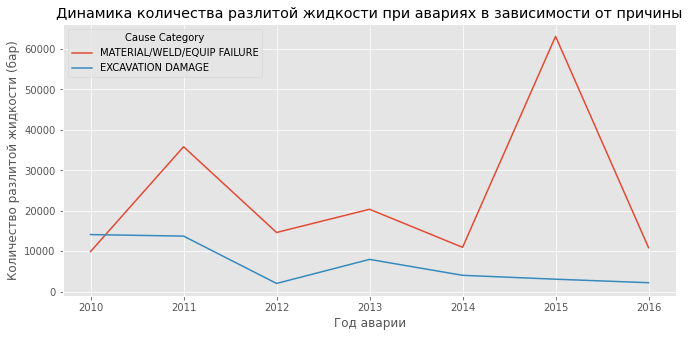

In [ ]:
pd.pivot_table(data=df, index = 'Accident Year', values = 'Net Loss (Barrels)', aggfunc = 'sum', 
     columns = 'Cause Category')[['MATERIAL/WELD/EQUIP FAILURE', 'EXCAVATION DAMAGE']].\
     plot(title = 'Динамика количества разлитой жидкости при авариях в зависимости от причины', 
                                                        ylabel = 'Количество разлитой жидкости (бар)', xlabel = 'Год аварии')

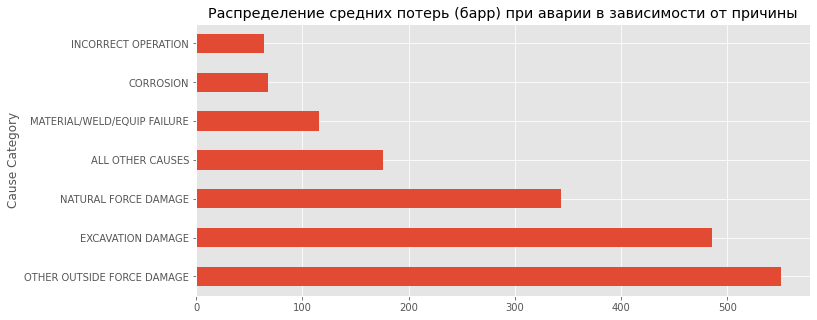

In [ ]:
df.groupby('Cause Category').mean()['Net Loss (Barrels)'].sort_values(ascending = False).plot(kind = 'barh', title = \
                                    'Распределение средних потерь (барр) при аварии в зависимости от причины')

In [ ]:
# Максимальные потери жидкости (сумма) при аварии наблюдаются при авариях по причине отказа оборудования/разрыва материала,
# на втором месте - повреждения при выемке грунта. В целом наблюдаем снижение данных потерь.
# Максимальные потери жидкости (среднее) при аварии наблюдаются при авариях по причине внешнего силового повреждения, 
# на втором месте - повреждения при выемке грунта.

In [ ]:
df['Cause Subcategory'].value_counts(normalize = True).head(10)

INTERNAL                                             0.129610
PUMP OR PUMP-RELATED EQUIPMENT                       0.105979
NON-THREADED CONNECTION FAILURE                      0.102399
EXTERNAL                                             0.082349
OTHER EQUIPMENT FAILURE                              0.073040
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              0.061224
THREADED CONNECTION/COUPLING FAILURE                 0.054064
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    0.040100
OTHER INCORRECT OPERATION                            0.030791
INCORRECT VALVE POSITION                             0.030075
Name: Cause Subcategory, dtype: float64

In [ ]:
# Если рассматривать количество аварий с точки зрения подкатегории причин, то на первом месте стоит внутренняя коррозия.

*Оценка показателей в зависимости от типа разлитой жидкости*

In [ ]:
df['Liquid Type'].value_counts(normalize = True).head(3)

CRUDE OIL                                             0.500179
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID    0.335840
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS            0.149660
Name: Liquid Type, dtype: float64

In [ ]:
df['Liquid Subtype'].value_counts().head()

DIESEL, FUEL OIL, KEROSENE, JET FUEL                        408
GASOLINE (NON-ETHANOL)                                      376
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    188
OTHER HVL                                                   171
MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)      97
Name: Liquid Subtype, dtype: int64

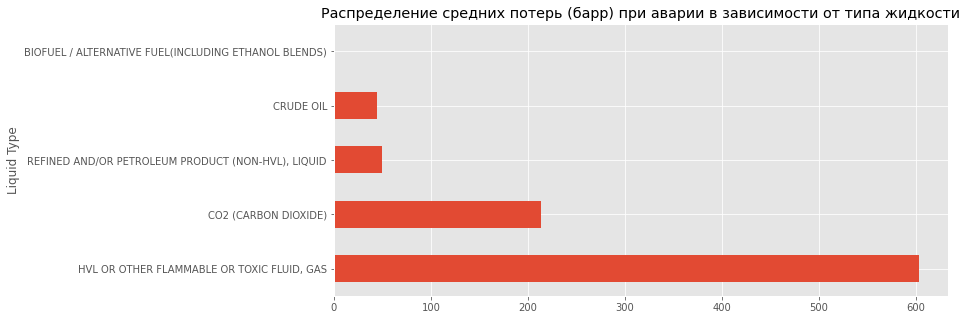

In [ ]:
df.groupby('Liquid Type').mean()['Net Loss (Barrels)'].sort_values(ascending = False).plot(kind = 'barh', title = \
                                    'Распределение средних потерь (барр) при аварии в зависимости от типа жидкости')

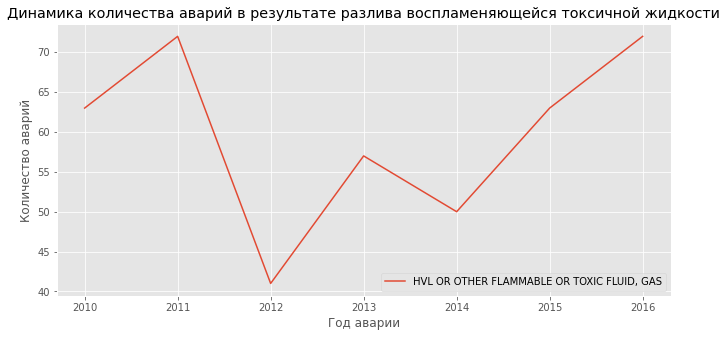

In [ ]:
pd.crosstab(df['Accident Year'], df['Liquid Type'])[['HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS']].\
plot(title = 'Динамика количества аварий в результате разлива воспламеняющейся токсичной жидкости',
         xlabel = 'Год аварии', ylabel = 'Количество аварий')
plt.legend(loc='best')

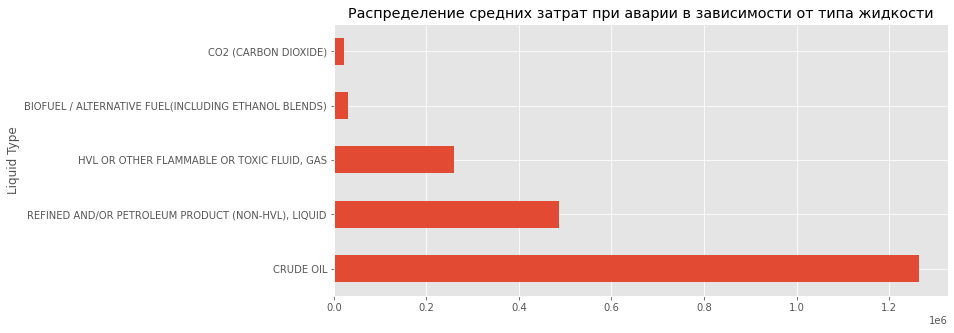

In [ ]:
df.groupby('Liquid Type').mean()['All Costs'].sort_values(ascending = False).plot(kind = 'barh', title = \
                                    'Распределение средних затрат при аварии в зависимости от типа жидкости')

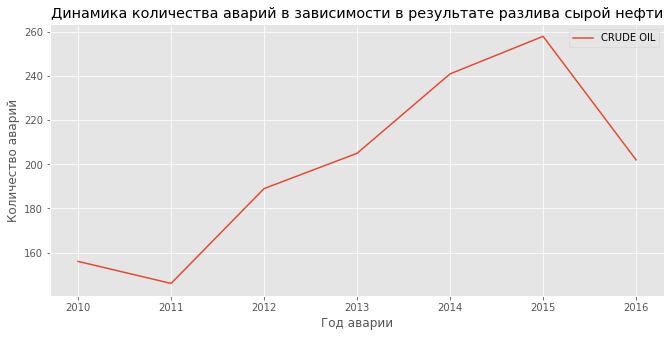

In [ ]:
pd.crosstab(df['Accident Year'], df['Liquid Type'])[['CRUDE OIL']].\
plot(title = 'Динамика количества аварий в зависимости в результате разлива сырой нефти',
         xlabel = 'Год аварии', ylabel = 'Количество аварий')
plt.legend(loc='best')

In [ ]:
# Самой частой разливаемой в результате аварии жидкостью является сырая нефть (50%), также такие аварии являются самыми затратными, 
# далее - нефтепродукты (36%), воспламеняющиеся и токсичные жидкости (15%).
# Наблюдаем стабильный рост аварий при разливе сырой нефти с 2011 по 2015 гг.
# Максимальные потери жидкости при авариях наблюдаем  при разливе воспламеняющейся и токсичной жидкости,
# количество таких аварий снижалось с 2010 по 2012 гг, затем наблюдаем резкий рост.

*Анализ данных по  штату с максимальным количеством аварий (Техас)*

In [ ]:
df['Accident State'].value_counts(normalize = True).head()

TX    0.360662
OK    0.084862
LA    0.060770
CA    0.055016
KS    0.053937
Name: Accident State, dtype: float64

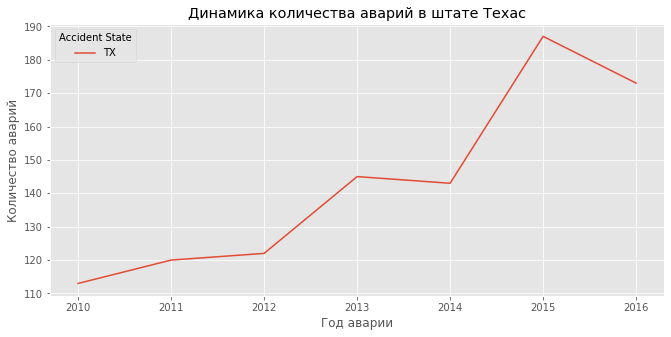

In [ ]:
df_TX = df[df['Accident State'] == 'TX']
pd.crosstab( df_TX['Accident Year'], df_TX['Accident State']).plot(title = 'Динамика количества аварий в штате Техас',
         xlabel = 'Год аварии', ylabel = 'Количество аварий')

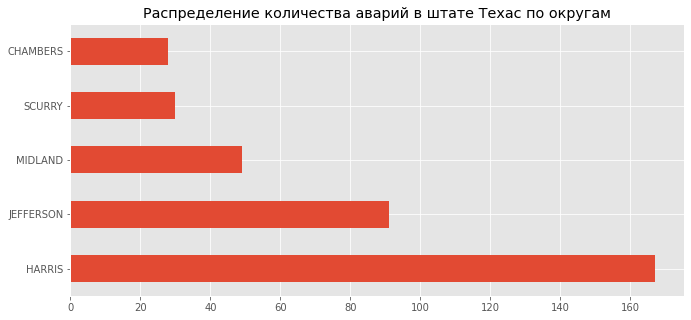

In [ ]:
df_TX['Accident County'].value_counts().head().plot(kind = 'barh', title = 'Распределение количества аварий в штате Техас по округам')

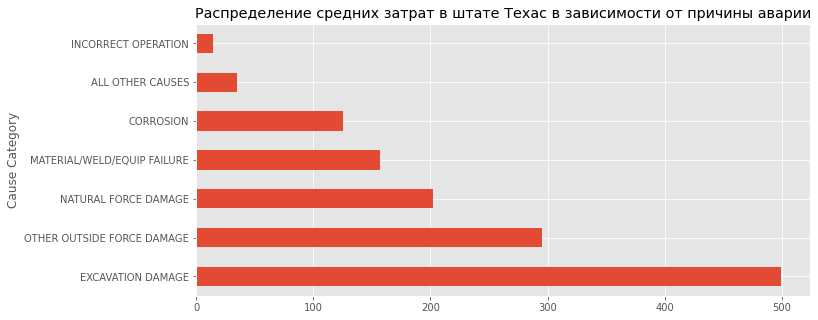

In [ ]:
df_TX.groupby('Cause Category').mean()['Net Loss (Barrels)'].sort_values(ascending = False).plot(kind = 'barh', title = \
                                    'Распределение средних затрат в штате Техас в зависимости от причины аварии')

In [ ]:
df_TX['Cause Category'].value_counts(normalize = True)

MATERIAL/WELD/EQUIP FAILURE    0.494516
CORROSION                      0.259222
INCORRECT OPERATION            0.130608
ALL OTHER CAUSES               0.054835
EXCAVATION DAMAGE              0.025922
NATURAL FORCE DAMAGE           0.020937
OTHER OUTSIDE FORCE DAMAGE     0.013958
Name: Cause Category, dtype: float64

In [ ]:
# Самое большое количество аварий - в штате Техас (36%), их количество устойчиво растет по 2015 г, затем небольшой спад.
# Максимальное количество аварий приходится на огруга Харрис и Джефферсон.
# Максимальные потери жидкости наблюдаем при авариях по причине повреждений при выемке грунта и внешнего силового повреждения.
# Максимальное количество аварий происходит по причинам отказа оборудования/разрыва материала и коррозии.

*Динамика затрат при аварии по годам и их распределение  в зависимости от штата*

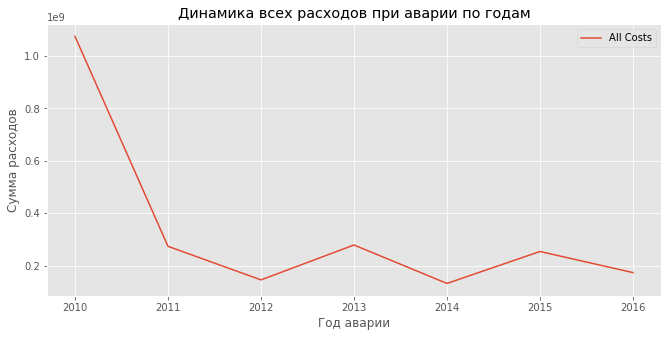

In [ ]:
pd.pivot_table(data = df, index = df['Accident Year'], aggfunc='sum', values=['All Costs']).plot(title = \
            'Динамика всех расходов при аварии по годам', xlabel = 'Год аварии', ylabel = 'Сумма расходов')


In [ ]:
# Максимум затрат приходится на 2010 год, затем расходы находятся в довольно узком интервале.

Text(0.5, 0, 'Сумма расходов')

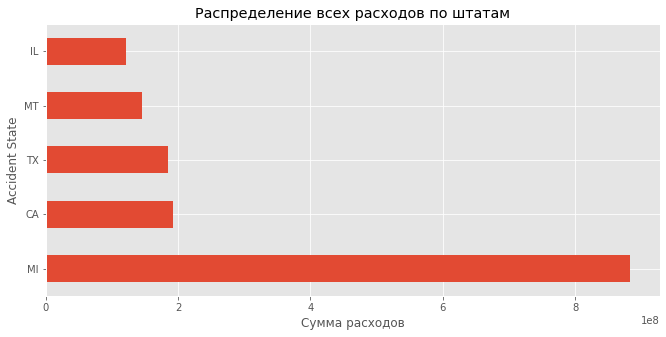

In [ ]:
df_pivot_costs_state = pd.pivot_table(data = df, index = df['Accident State'], aggfunc=sum, values=['Property Damage Costs',
       'Lost Commodity Costs', 'Public/Private Property Damage Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs',
       'Other Costs', 'All Costs']).sort_values(by=['All Costs'], ascending = False).head(5)
df_pivot_costs_state['All Costs'].plot(kind = 'barh', title = 'Распределение всех расходов по штатам')
plt.xlabel('Сумма расходов')

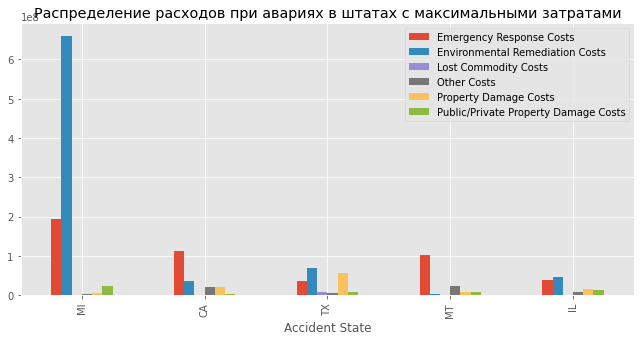

In [ ]:
df_pivot_costs_state.drop('All Costs', axis = 1).plot(kind = 'bar',
        title = 'Распределение расходов при авариях в штатах с максимальными затратами')

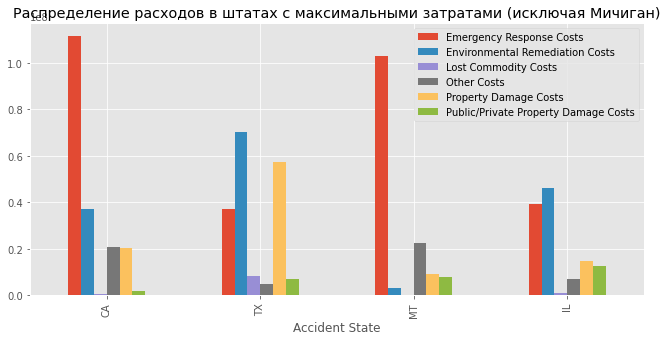

In [ ]:
df_pivot_costs_state.drop('All Costs', axis = 1).loc[['CA', 'TX', 'MT', 'IL']].plot(kind = 'bar', 
                        title = 'Распределение расходов в штатах с максимальными затратами (исключая Мичиган)')          

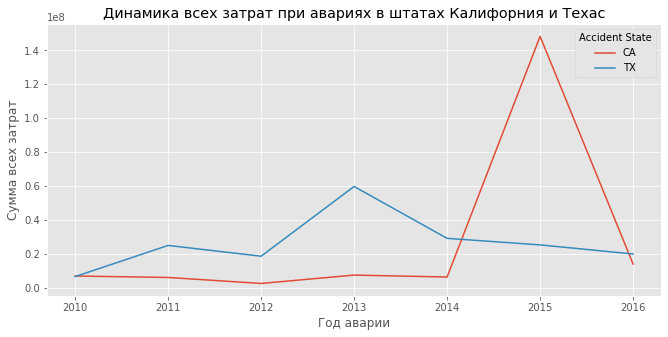

In [ ]:
pd.pivot_table(data = df[df['Accident State'].isin(['CA','TX'])], index = 'Accident Year', 
               columns = 'Accident State', aggfunc='sum', values='All Costs').plot(title = \
                'Динамика всех затрат при авариях в штатах Калифорния и Техас',
               xlabel = 'Год аварии', ylabel = 'Сумма всех затрат')

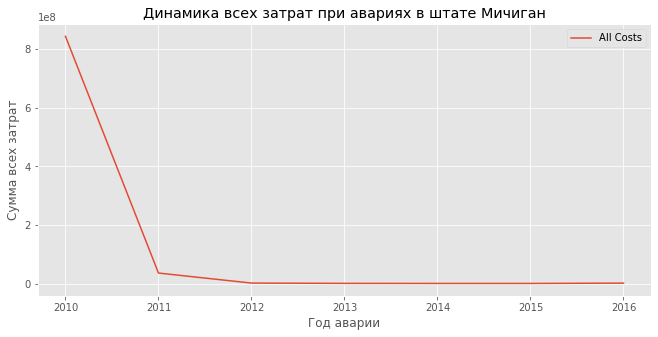

In [ ]:
pd.pivot_table(data = df[df['Accident State'] == 'MI'], index = 'Accident Year', aggfunc='sum', values='All Costs').\
plot(title = 'Динамика всех затрат при авариях в штатe Мичиган',
               xlabel = 'Год аварии', ylabel = 'Сумма всех затрат')

In [ ]:
# Больше всего расходов при аварии у штата Мичиган. Основную долю в расходах занимают затраты на восстановление окружающей среды.
# У штата Техас и Иллинойс основные расходы - то затраты на восстановление окружающей среды и затраты за повреждение имущества.
# У штатов Калифорния и Монтана основную долю занимают расходы на экстренное реагирование.
# У штатов Мичиган и Калифорния максимум затрат приходятся на 2010 и 2015 гг соответственно, 
# У штата Техас затраты растут до 2013 года, потом падают.

*Оценка показателей в зависимости от компании*

In [ ]:
df['Operator Name'].value_counts().head()

ENTERPRISE CRUDE PIPELINE LLC        194
SUNOCO PIPELINE L.P.                 180
PLAINS PIPELINE, L.P.                156
ENTERPRISE PRODUCTS OPERATING LLC    155
MAGELLAN PIPELINE COMPANY, LP        140
Name: Operator Name, dtype: int64

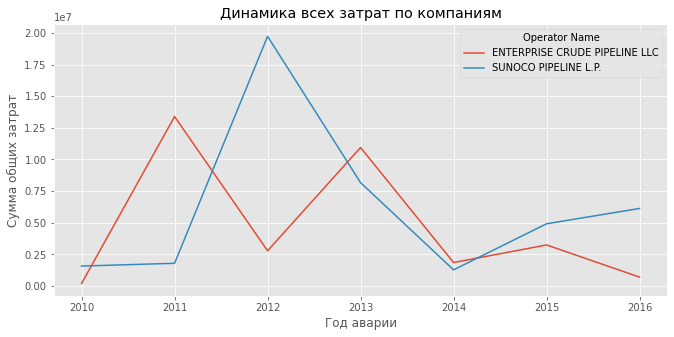

In [ ]:
pd.pivot_table(data = df[df['Operator Name'].isin(['ENTERPRISE CRUDE PIPELINE LLC', 'SUNOCO PIPELINE L.P.'])], 
    index = 'Accident Year', columns = 'Operator Name', aggfunc='sum', values='All Costs').plot\
                                     (title = 'Динамика всех затрат по компаниям', 
                                     xlabel = 'Год аварии',
                                    ylabel = 'Сумма общих затрат')         

In [ ]:
# Компании ENTERPRISE CRUDE PIPELINE LLC и SUNOCO PIPELINE L.P. имеют максимальное количество аварий.
# Затраты компании ENTERPRISE CRUDE PIPELINE LLC в целом имеют тенденцию к снижению.
# Затраты компании SUNOCO PIPELINE L.P.снизились вс 2012 года.

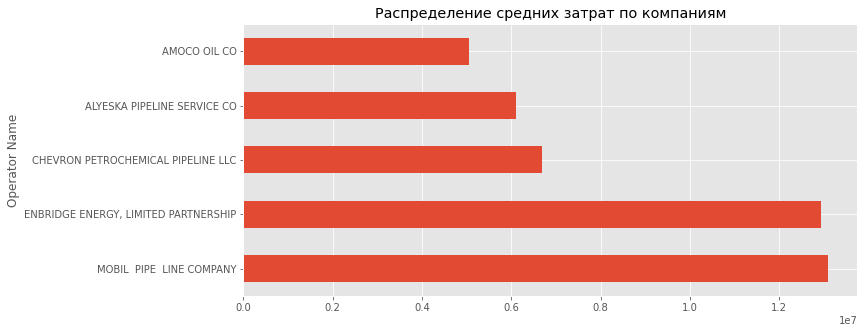

In [ ]:
df.groupby('Operator Name')['All Costs'].mean().sort_values(ascending=False).head().plot(kind = 'barh', 
                                                title = 'Распределение средних затрат по компаниям')

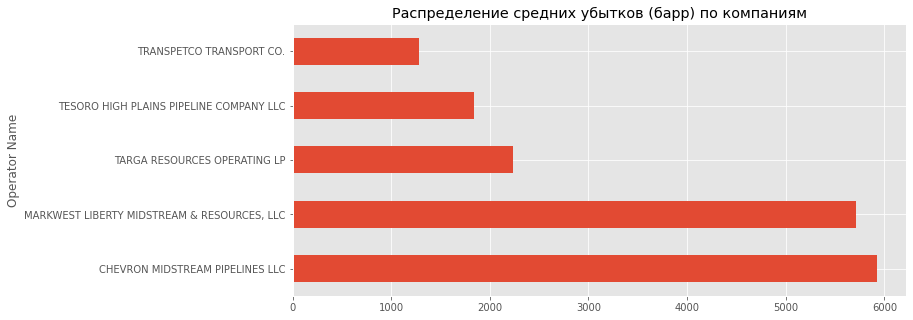

In [ ]:
df.groupby('Operator Name')['Net Loss (Barrels)'].mean().sort_values(ascending=False).head().plot(kind = 'barh', 
                                                title = 'Распределение средних убытков (барр) по компаниям')

In [ ]:
# Компании MOBIL  PIPE  LINE COMPANY и ENBRIDGE ENERGY, LIMITED PARTNERSHIP имеют максимальные затраты при авариях.
# Компании CHEVRON MIDSTREAM PIPELINES LLC и MARKWEST LIBERTY MIDSTREAM & RESOURCES, LLC имеют максимальные потери жидкости при авариях.

In [ ]:
df_costs_company = pd.pivot_table(data = df[df['Operator Name'].isin(['ENTERPRISE CRUDE PIPELINE LLC','SUNOCO PIPELINE L.P.', 
'PLAINS PIPELINE, L.P.', 'ENTERPRISE PRODUCTS OPERATING LLC', 'MAGELLAN PIPELINE COMPANY, LP', 'MOBIL  PIPE  LINE COMPANY',
'ENBRIDGE ENERGY, LIMITED PARTNERSHIP','MARKWEST LIBERTY MIDSTREAM & RESOURCES, LLC', 'CHEVRON MIDSTREAM PIPELINES LLC', 
'AMOCO OIL CO', 'ALYESKA PIPELINE SERVICE CO', 'CHEVRON PETROCHEMICAL PIPELINE LLC', 'TARGA RESOURCES OPERATING LP', 
'TESORO HIGH PLAINS PIPELINE COMPANY LLC', 'TRANSPETCO TRANSPORT CO.'])], index = 'Accident Year', 
columns = 'Operator Name', aggfunc='mean', values='All Costs')

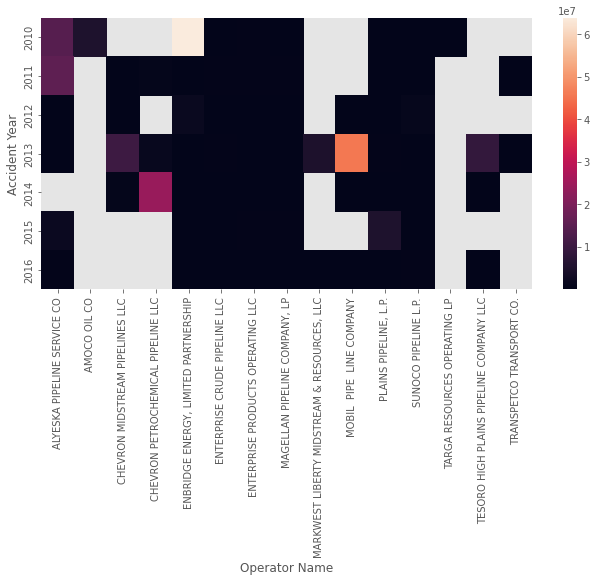

In [ ]:
sns.heatmap(df_costs_company)

In [ ]:
df_loss_company = pd.pivot_table(data = df[df['Operator Name'].isin(['ENTERPRISE CRUDE PIPELINE LLC','SUNOCO PIPELINE L.P.', 
'PLAINS PIPELINE, L.P.', 'ENTERPRISE PRODUCTS OPERATING LLC', 'MAGELLAN PIPELINE COMPANY, LP', 'MOBIL  PIPE  LINE COMPANY',
'ENBRIDGE ENERGY, LIMITED PARTNERSHIP', 'MARKWEST LIBERTY MIDSTREAM & RESOURCES, LLC', 'CHEVRON MIDSTREAM PIPELINES LLC',
 'AMOCO OIL CO', 'ALYESKA PIPELINE SERVICE CO', 'CHEVRON PETROCHEMICAL PIPELINE LLC', 'TARGA RESOURCES OPERATING LP', 
 'TESORO HIGH PLAINS PIPELINE COMPANY LLC', 'TRANSPETCO TRANSPORT CO.'])], index = 'Accident Year', columns = 'Operator Name',
  aggfunc='mean', values='Net Loss (Barrels)')

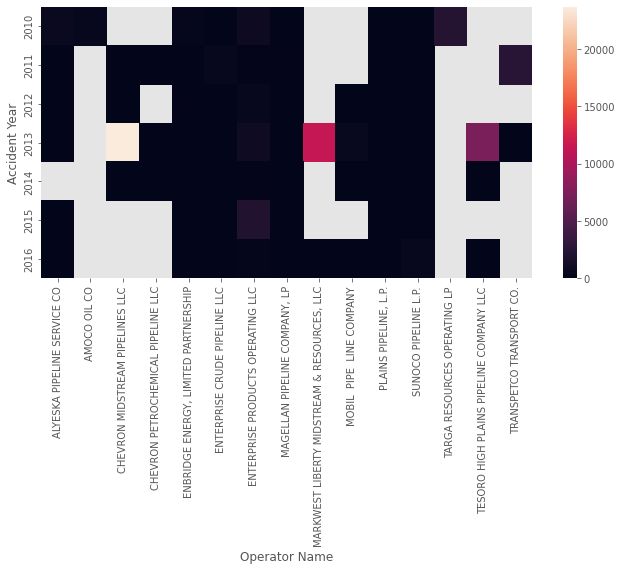

In [ ]:
sns.heatmap(df_loss_company)

In [ ]:
# По тепловой карте определили в каких годах и в каких компаниях были самые крупные аварии (таблица 1 в теоретической части).

*Оценка общего времени простоя в зависимости от причины аварии и года аварии*

In [ ]:
df['time']= df['Restart Date/Time']-df['Shutdown Date/Time']
df.groupby('Cause Category').agg({'time': 'sum'}).sort_values(by = 'time', ascending = False)

,time
Cause Category,
CORROSION,4029 days 16:58:00
MATERIAL/WELD/EQUIP FAILURE,2650 days 01:18:00
NATURAL FORCE DAMAGE,2136 days 18:31:00
INCORRECT OPERATION,667 days 08:25:00
EXCAVATION DAMAGE,548 days 11:38:00
OTHER OUTSIDE FORCE DAMAGE,257 days 06:28:00
ALL OTHER CAUSES,255 days 23:27:00


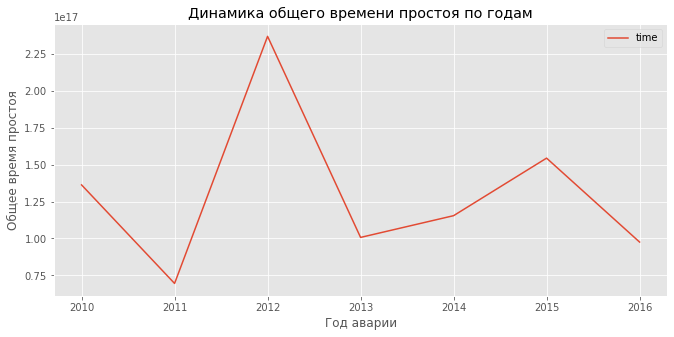

In [ ]:
df.groupby('Accident Year').agg({'time': 'sum'}).plot(title = 'Динамика общего времени простоя по годам',
                                                     xlabel = 'Год аварии', ylabel = 'Общее время простоя')

In [ ]:
# Максимальное время простоя наблюдаем при авариях по причине коррозии.
# Наблюдаем в целом снижение простоя с 2012 года.

**Корреляции, регрессия**


*Взаимосвязь всех столбцов*

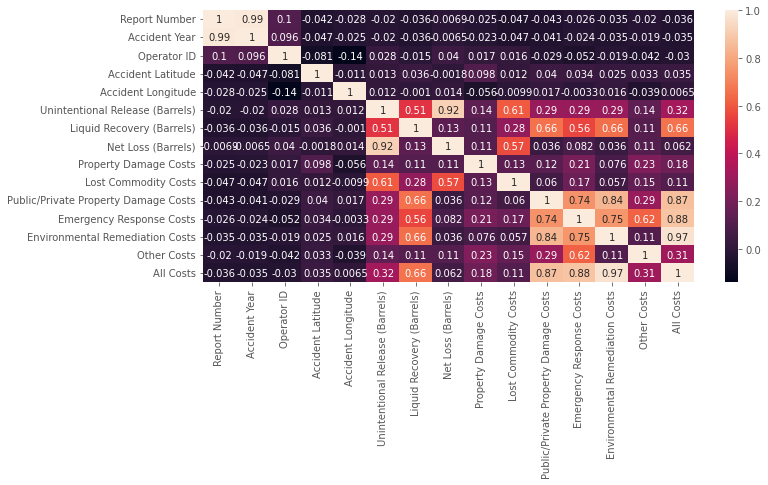

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# По тепловой карте можно увидеть, что расходы на восстановление окружающей среды, расходы на ущерб гос/частной собственности 
# и расходы на экстренное реагирование имеют большую прямую связь. 
# Также сильно коррелируют между собой непреднамеренный разлив в баррелях и чистый убыток в баррелях.

*Расчет коэффициентов корреляции между количеством аварий и объемом добычи нефти в США*

In [ ]:
data = pd.read_csv('crude_oil_production.csv')
data.head()

,Month,U.S. Crude Oil (Thousand Barrels per Day) thousand barrels per day
0,Aug 2021,11141
1,Jul 2021,11326
2,Jun 2021,11288
3,May 2021,11334
4,Apr 2021,11230


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Month                                                                121 non-null    object
 1   U.S. Crude Oil (Thousand Barrels per Day)  thousand barrels per day  121 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data['month_'] = data['Month'].dt.strftime('%b')
data['year_'] = data['Month'].dt.strftime('%Y')

In [ ]:
data = data[data['year_'].isin(['2010', '2011', '2012', '2013', '2014', '2015', '2016'])]

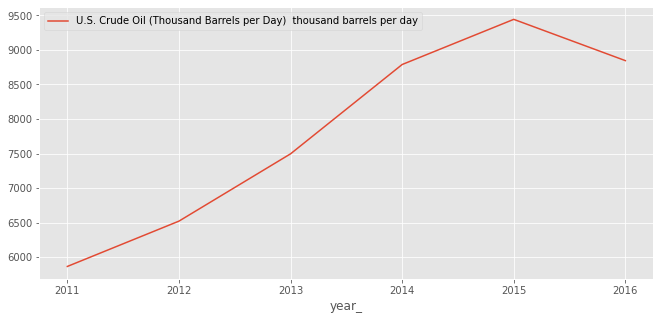

In [ ]:
data_grouped_US = data.groupby('year_').mean().reset_index()
data_grouped_US.plot(x = 'year_', y = 'U.S. Crude Oil (Thousand Barrels per Day)  thousand barrels per day')

In [ ]:
df_without2010_US = df.drop(df[df['Accident Year'] == 2010].index)
df_final_US= df_without2010_US.groupby('Accident Year').count()['Report Number'].reset_index()
df_joined_US = df_final_US.join(data_grouped_US, how = 'left')

In [ ]:
df_joined_US[['U.S. Crude Oil (Thousand Barrels per Day)  thousand barrels per day', 'Report Number']].corr()

,U.S. Crude Oil (Thousand Barrels per Day) thousand barrels per day,Report Number
U.S. Crude Oil (Thousand Barrels per Day) thousand barrels per day,1.000000,0.957957
Report Number,0.957957,1.000000


In [ ]:
df_joined_US[['U.S. Crude Oil (Thousand Barrels per Day)  thousand barrels per day', 'Report Number']].corr(method = 'spearman')

,U.S. Crude Oil (Thousand Barrels per Day) thousand barrels per day,Report Number
U.S. Crude Oil (Thousand Barrels per Day) thousand barrels per day,1.000000,0.942857
Report Number,0.942857,1.000000


In [ ]:
# Добыча нефти в США и количество аварий имеют очень сильную линейную связь.

*Расчет коэффициентов корреляции между количеством аварий и объемом добычи нефти в штате Техас*

In [ ]:
data_TX = pd.read_csv('TX_crude_oil_production .csv')
data_TX.head()

,Month,Texas Crude Oil (Thousand Barrels per Day) thousand barrels per day
0,Aug 2021,4834
1,Jul 2021,4816
2,Jun 2021,4782
3,May 2021,4806
4,Apr 2021,4837


In [ ]:
data_TX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Month                                                                 121 non-null    object
 1   Texas Crude Oil (Thousand Barrels per Day)  thousand barrels per day  121 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
data_TX['Month'] = pd.to_datetime(data_TX['Month'])
data_TX['month_'] = data_TX['Month'].dt.strftime('%b')
data_TX['year_'] = data_TX['Month'].dt.strftime('%Y')

In [ ]:
data_TX = data_TX[data_TX['year_'].isin(['2010', '2011', '2012', '2013', '2014', '2015', '2016'])]

In [ ]:
data_grouped_TX = data_TX.groupby('year_').mean().reset_index()

In [ ]:
df_without2010_TX = df_TX.drop(df_TX[df_TX['Accident Year'] == 2010].index)
df_final_TX = df_without2010_TX.groupby('Accident Year').count()['Report Number'].reset_index()
df_joined_TX = df_final_TX.join(data_grouped_TX, how = 'left')

In [ ]:
df_joined_TX[['Texas Crude Oil (Thousand Barrels per Day)  thousand barrels per day', 'Report Number']].corr()

,Texas Crude Oil (Thousand Barrels per Day) thousand barrels per day,Report Number
Texas Crude Oil (Thousand Barrels per Day) thousand barrels per day,1.000000,0.889061
Report Number,0.889061,1.000000


In [ ]:
df_joined_TX[['Texas Crude Oil (Thousand Barrels per Day)  thousand barrels per day', 'Report Number']].corr(method = 'spearman')

,Texas Crude Oil (Thousand Barrels per Day) thousand barrels per day,Report Number
Texas Crude Oil (Thousand Barrels per Day) thousand barrels per day,1.000000,0.942857
Report Number,0.942857,1.000000


In [ ]:
# Добыча нефти в Техасе и количество аварий в Техасе сильно коррелируют между собой.

*Расчет коэффициентов корреляции между количеством аварий и протяженностью трубопроводов*

In [ ]:
data_mileage = pd.read_excel('table_oil_pipeline_profile.xlsx')
data_mileage = data_mileage[data_mileage['Accident Year'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016])]
data_mileage

,Accident Year,"Miles of pipeline (statute miles)b, all lines",Crude lines,Product lines
19,2010,181986,54630.5,64799.8
20,2011,183580,56100.2,64129.8
21,2012,186221,57462.8,64041.8
22,2013,192412,61086.7,63351
23,2014,199793,66943.2,61766.3
24,2015,208621,73055.4,62634.2
25,2016,212109,75709.8,62460.8


In [ ]:
data_mileage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 19 to 25
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Accident Year                                   7 non-null      int64 
 1   Miles of pipeline (statute miles)b, all lines   7 non-null      object
 2   Crude lines                                     7 non-null      object
 3   Product lines                                   7 non-null      object
dtypes: int64(1), object(3)
memory usage: 280.0+ bytes


In [ ]:
data_mileage['Miles of pipeline (statute miles)b, all lines '] = data_mileage['Miles of pipeline (statute miles)b, all lines '].astype(int)

In [ ]:
df_grouped = df.groupby('Accident Year').count()['Report Number'].reset_index()
df_joined = df_grouped.merge(data_mileage, on = 'Accident Year', how = 'left')

In [ ]:
df_joined[['Report Number', 'Miles of pipeline (statute miles)b, all lines ']].corr()

,Report Number,"Miles of pipeline (statute miles)b, all lines"
Report Number,1.000000,0.844064
"Miles of pipeline (statute miles)b, all lines",0.844064,1.000000


In [ ]:
df_joined[['Report Number', 'Miles of pipeline (statute miles)b, all lines ']].corr(method = 'spearman')

,Report Number,"Miles of pipeline (statute miles)b, all lines"
Report Number,1.000000,0.857143
"Miles of pipeline (statute miles)b, all lines",0.857143,1.000000


In [ ]:
# Протяженность труб и количество аварий имеют высокие коэффициенты корреляции.

*Линейная регрессия между непреднамеренным разливом жидкости и убытками от разлитой жидкости*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Unintentional Release (Barrels)']]
y = df['Net Loss (Barrels)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(1955, 1)

In [ ]:
y_train.shape

(1955,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.85622174])

In [ ]:
model.intercept_

-38.239842722218015

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([-3.81970316e+01, -3.73836210e+01, -3.73236855e+01, -3.65273992e+01,
       -3.56711775e+01, -2.11154079e+01, -2.83932927e+01, -3.74264321e+01,
       -3.80343495e+01, -3.77261097e+01,  3.88201138e+01, -3.66130214e+01,
        2.69310750e+03, -3.78117319e+01, -3.81970316e+01, -3.77261097e+01,
        1.98291156e+01, -3.73836210e+01,  2.59767877e+01, -2.53965166e+01,
       -3.78117319e+01, -3.80343495e+01, -3.73836210e+01, -3.39587340e+01,
       -3.43868449e+01, -3.78973540e+01,  6.28368770e+00, -3.80343495e+01,
       -3.79401651e+01, -3.78117319e+01,  1.71564051e+04, -3.74093076e+01,
       -3.77261097e+01, -3.60992884e+01, -3.56711775e+01, -3.80429117e+01,
       -3.76062386e+01, -3.80685984e+01, -3.56711775e+01, -3.81542205e+01,
       -3.80685984e+01,  2.90135532e-01, -3.65273992e+01, -3.52430666e+01,
        1.56165047e+01, -1.76905210e+01,  1.33004505e+02, -3.82227183e+01,
       -3.44724671e+01,  2.01502244e+02, -3.79144785e+01, -3.80343495e+01,
       -2.11154079e+01, -

In [ ]:
y_test

2654    0.05
1251    0.00
2684    0.00
141     0.25
211     3.00
        ... 
601     0.00
2466    0.00
1480    0.00
303     2.30
52      2.99
Name: Net Loss (Barrels), Length: 838, dtype: float64

In [ ]:
model.score(X_test, y_test)

0.6833024341829099

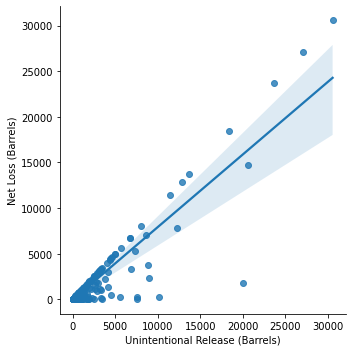

In [ ]:
sns.lmplot(x='Unintentional Release (Barrels)',y='Net Loss (Barrels)',data=df)

In [ ]:
# Коэффициент детерминации больше 0,5, можно сказать,
# что модель неплохо описывает зависимость потерь жидкости от непреднамеренного разлива жидкости

**Проверка гипотез**

In [ ]:
from scipy import stats

Н0: нет статистически значимых различий между выборками (все расходы в США и все расходы в Техасе)

Н1: различия есть 

alpha = 0.05

In [ ]:
x_1 = df_TX['All Costs']
y_1 = df['All Costs']

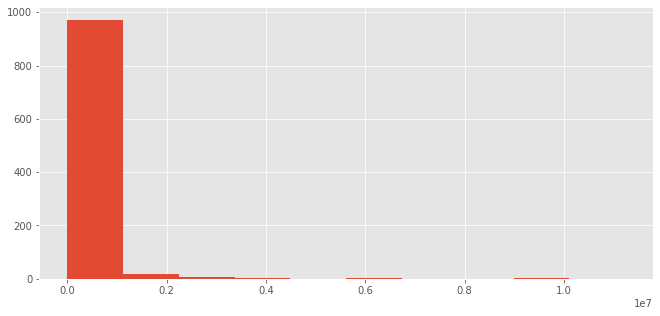

In [ ]:
x_1.hist()

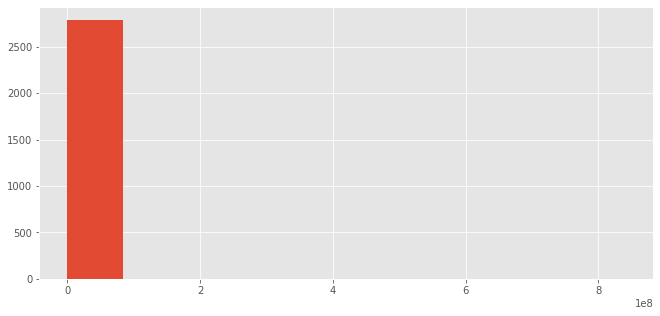

In [ ]:
y_1.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


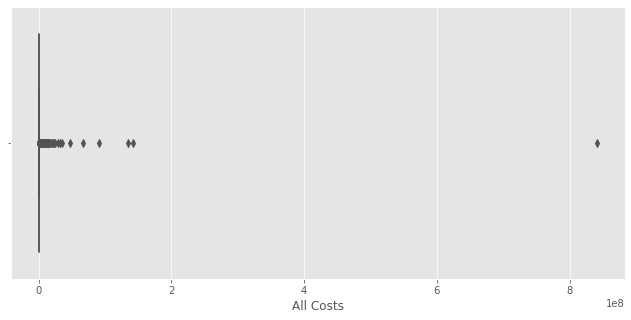

In [ ]:
sns.boxplot(y_1)

In [ ]:
res_1 = stats.mannwhitneyu(x_1, y_1)
res_1

MannwhitneyuResult(statistic=1309665.0, pvalue=0.001116625959435299)

In [ ]:
# Расходы имеют ненормальное распределение, поэтому используем тест Манна-Уитни для проверки гипотезы.
# По результату отвергаем нулевую гипотезу, различия между выборками не случайны (pvalue < alpha)

Н0: нет статистически значимых различий между выборками (непреднамеренный разлив жидкости в США и в Техасе по причине отказа оборудования/разрыва материала)

Н1: различия есть 


In [ ]:
x_2 = df_TX[(df_TX['Cause Category'] == 'MATERIAL/WELD/EQUIP FAILURE')]['Unintentional Release (Barrels)']
y_2= df[(df['Cause Category'] == 'MATERIAL/WELD/EQUIP FAILURE')]['Unintentional Release (Barrels)']

In [ ]:
res_2 = stats.mannwhitneyu(x_2, y_2)
res_2

MannwhitneyuResult(statistic=350761.5, pvalue=0.31622862545898456)

In [ ]:
# pvalue < 0.05, следовательно, нет статистически значимых различий между выборками

Н0: нет значимых различий между сбором разлитой жидкости при аварии по причине выемки грунта и по причине внешнего силового воздействия

Н1: различия есть

In [ ]:
x_3= df[(df['Cause Category'] == 'EXCAVATION DAMAGE')]['Liquid Recovery (Barrels)']
y_3 = df[(df['Cause Category'] == 'OTHER OUTSIDE FORCE DAMAGE')]['Liquid Recovery (Barrels)']

In [ ]:
res_3 = stats.mannwhitneyu(x_3, y_3)
res_3

MannwhitneyuResult(statistic=2401.5, pvalue=0.0851052211115862)

In [ ]:
# pvalue > 0.05, следовательно, не можем опровергнуть основную (нулевую) гипотезу.

Н0: значимых различий между потерями жидкости в наземных трубопроводах при авариях по причине внутренней и внешней коррозиями нет

Н1: различия есть

In [ ]:
x_4= df[(df['Cause Subcategory'] == 'INTERNAL')& (df['Pipeline Type'] == 'ABOVEGROUND')]['Net Loss (Barrels)']
y_4 = df[(df['Cause Subcategory'] == 'EXTERNAL')& (df['Pipeline Type'] == 'ABOVEGROUND')]['Net Loss (Barrels)']

In [ ]:
res_4 = stats.mannwhitneyu(x_4, y_4)
res_4

MannwhitneyuResult(statistic=1051.5, pvalue=0.38027125366802034)

In [ ]:
# pvalue > alpha, значит, различия между выборками случайны

Н0: значимых различий между потерями жидкости в подземных трубопроводах при авариях по причине внутренней и внешней коррозиями нет

Н1: различия есть

In [ ]:
x_5= df[(df['Cause Subcategory'] == 'INTERNAL')& (df['Pipeline Type'] == 'UNDERGROUND')]['Net Loss (Barrels)']
y_5 = df[(df['Cause Subcategory'] == 'EXTERNAL')& (df['Pipeline Type'] == 'UNDERGROUND')]['Net Loss (Barrels)']

In [ ]:
res_5 = stats.mannwhitneyu(x_5, y_5)
res_5

MannwhitneyuResult(statistic=18766.5, pvalue=0.001477966457737106)

In [ ]:
# pvalue < alpha, значит, различия между выборками не случайны